In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# sns.get_dataset_names()

In [ ]:
# importing dataset
df=sns.load_dataset('iris')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
#finding null columns
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# finding values of the species columns

df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# get information  hole dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Exploration and Data Analysis **

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='species', ylabel='petal_length'>

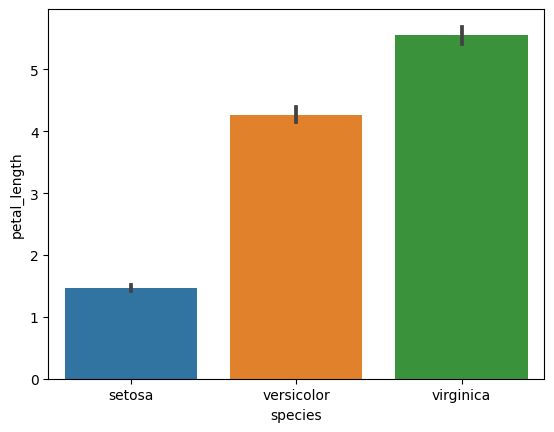

In [ ]:
sns.barplot(y='petal_length',x='species',data=df)

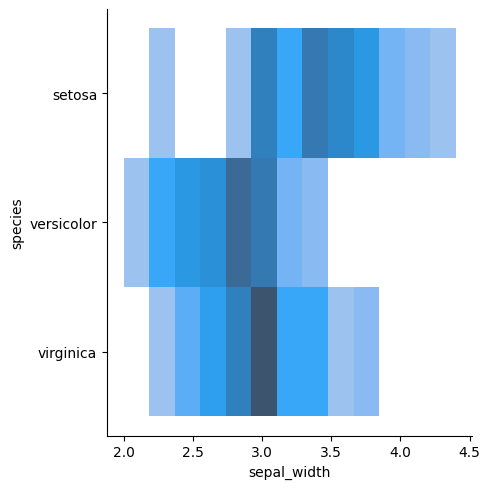

In [ ]:
sns.displot(x='sepal_width', y='species' ,data=df)

In [ ]:
df.tail(65)

,sepal_length,sepal_width,petal_length,petal_width,species
85,6.0,3.4,4.5,1.6,versicolor
86,6.7,3.1,4.7,1.5,versicolor
87,6.3,2.3,4.4,1.3,versicolor
88,5.6,3.0,4.1,1.3,versicolor
89,5.5,2.5,4.0,1.3,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# **Featuea Selection**

In [ ]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']


# **Feature Scalling**

In [ ]:
# Convert categorical target variable to numerical
# For simplicity, let's encode the species as 0, 1, 2
from sklearn.preprocessing  import  LabelEncoder

encoder=LabelEncoder()

y=encoder.fit_transform(y)

# df['species'].unique()

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)
# y_train = y_train['species']

(120,)


# **Model Selection **

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#  from sklearn.naive_bayes import GaussianNB

# Create a Logistic Regression model
model_logistic = LogisticRegression()

model_kn=KNeighborsClassifier()

model_naive_gaussian=GaussianNB()

model_logistic.fit(x_train,y_train)
model_kn.fit(x_train,y_train)
model_naive_gaussian.fit(x_train,y_train)



GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score

logistic_pred=model.predict(x_train)
knn_pred=model_kn.predict(x_train)
naive_gaussian=model_naive_gaussian.predict(x_train)

predict_logistic=accuracy_score(logistic_pred,y_train)
predict_knn=accuracy_score(knn_pred,y_train)
predict_naive_gaussian=accuracy_score(naive_gaussian,y_train)
print(f'Logistic Regression  accuracy is  : {predict_logistic:.2f}')
print(f'KNN  Clasification accuracy is : {predict_knn:.2f}')
print(f'Naive Bayes GaussianNB accuracy is : {predict_naive_gaussian:.2f}')

Logistic Regression  accuracy is  : 0.97
KNN  Clasification accuracy is : 0.97
Naive Bayes GaussianNB accuracy is : 0.95


In [ ]:
#  5.1 3.5 1.4 0.2   setosa
new_data =pd.DataFrame({
    'sepal_length': [5.1],
    'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.2]
})



#do Priction
prediction=model_logistic.predict(new_data)   # Logistic_Regession

# prediction=model_kn.predict(new_data)    # KNN Classification

# prediction=model_naive_gaussian.predict(new_data)  # Naive_Bayes_Therom

# prediction values check out
prediction

# converting values on there original form
predicted_species_labels = le.inverse_transform(prediction)


print(predicted_species_labels)

['setosa']


In [ ]:
# 6.7	 3.0 	5.2	 2.3	 virginica
new_data_1 =pd.DataFrame({
    'sepal_length': [6.7],
    'sepal_width': [3.0],
    'petal_length': [5.2],
    'petal_width': [2.3]
})
 # try to predict
prediction_1=model.predict(new_data_1)

# converting values on there original form
predicted_species_labels_1 = le.inverse_transform(prediction_1)

print(predicted_species_labels_1)

array(['setosa', 'virginica', 'setosa'], dtype=object)

In [ ]:
# 6.0	3.4	4.5	1.6	versicolor
new_data_2 =pd.DataFrame({
    'sepal_length': [6.0],
    'sepal_width': [3.4],
    'petal_length': [4.5],
    'petal_width': [1.6]
})
 # try to predict
prediction_2=model.predict(new_data_2)

# converting values on there original form
predicted_species_labels_2 = le.inverse_transform(prediction_2)

print(predicted_species_labels_2)